pylint: disable=import-error

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import seaborn as sns  # type: ignore
from sklearn.datasets import load_digits  # type: ignore
from sklearn.decomposition import PCA  # type: ignore
from sklearn.manifold import TSNE  # type: ignore

In [3]:
def load_data() -> pd.DataFrame:
    digits = load_digits()
    df = pd.DataFrame(digits.data)
    df["target"] = digits.target
    return df

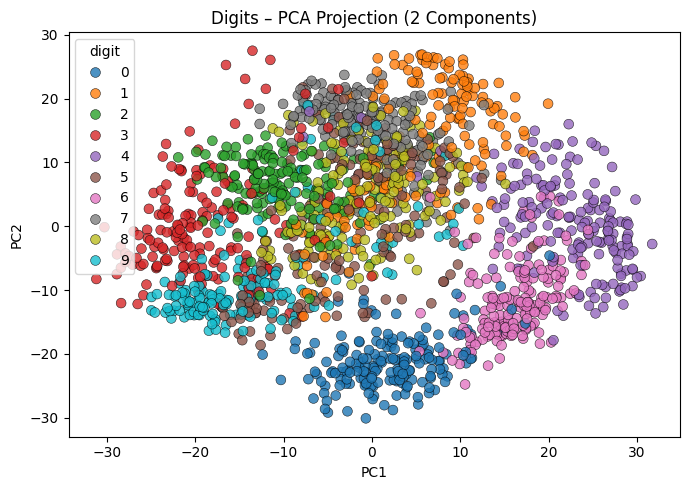

In [4]:
df = load_data()
pca_result = PCA(n_components=2, random_state=42).fit_transform(df.iloc[:, :-1])
plot_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
plot_df["digit"] = df["target"]

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=plot_df,
    x="PC1",
    y="PC2",
    hue="digit",
    palette="tab10",
    s=50,
    alpha=0.8,
    edgecolor="k",
    linewidth=0.4,
)
plt.title("Digits – PCA Projection (2 Components)")
plt.tight_layout()
plt.show()
plt.close()

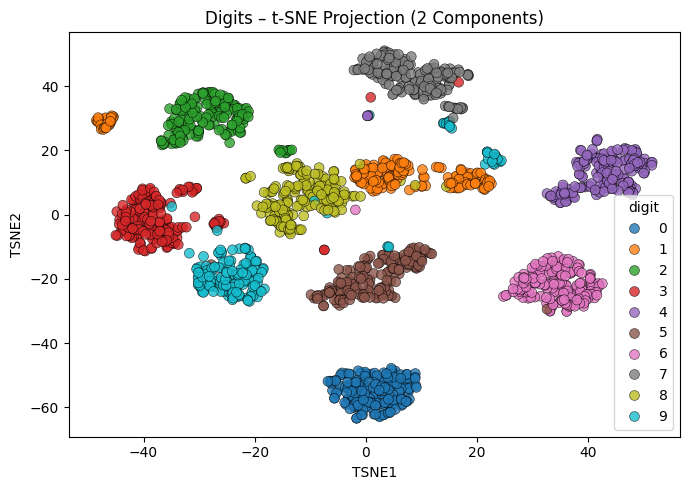

In [5]:
df = load_data()
tsne_result = TSNE(
    n_components=2,
    init="pca",
    learning_rate="auto",
    perplexity=30,
    random_state=42,
).fit_transform(df.iloc[:, :-1])

plot_df = pd.DataFrame(tsne_result, columns=["TSNE1", "TSNE2"])
plot_df["digit"] = df["target"]

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=plot_df,
    x="TSNE1",
    y="TSNE2",
    hue="digit",
    palette="tab10",
    s=50,
    alpha=0.8,
    edgecolor="k",
    linewidth=0.4,
)
plt.title("Digits – t-SNE Projection (2 Components)")
plt.tight_layout()
plt.show()
plt.close()

In [6]:
def load_mpg() -> pd.DataFrame:
    return sns.load_dataset("mpg").dropna()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_17997/2203370093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


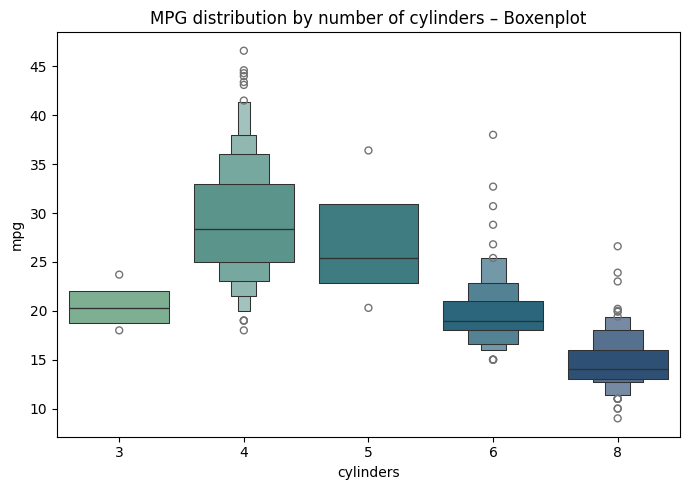

In [7]:
df = load_mpg()
plt.figure(figsize=(7, 5))
sns.boxenplot(
    data=df,
    x="cylinders",
    y="mpg",
    palette="crest",
    k_depth="tukey",
)
plt.title("MPG distribution by number of cylinders – Boxenplot")
plt.tight_layout()
plt.show()
plt.close()

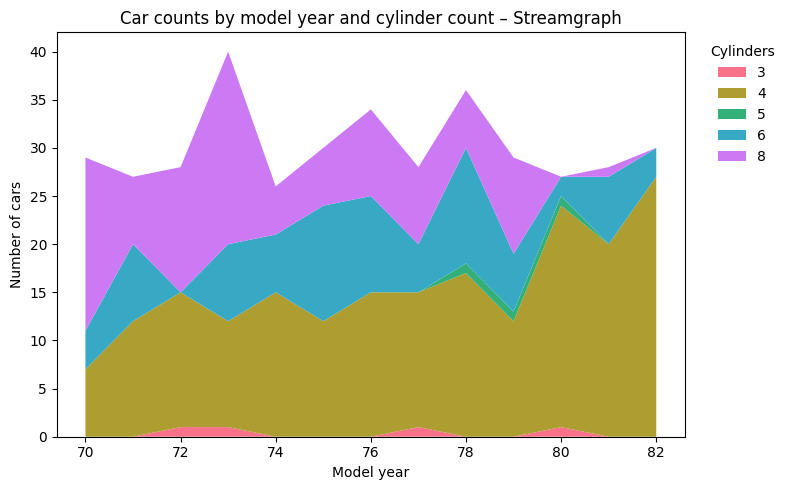

In [8]:
df = load_mpg()
counts = (
    df.groupby(["model_year", "cylinders"]).size().unstack(fill_value=0).sort_index()
)
years = counts.index
cylinders = counts.columns
colors = sns.color_palette("husl", n_colors=len(cylinders))

plt.figure(figsize=(8, 5))
plt.stackplot(years, [counts[c] for c in cylinders], colors=colors, labels=cylinders)
plt.xlabel("Model year")
plt.ylabel("Number of cars")
plt.title("Car counts by model year and cylinder count – Streamgraph")
plt.legend(
    title="Cylinders",
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),
    frameon=False,
)
plt.tight_layout()
plt.show()
plt.close()